In [61]:
# Training can be replicated on Kaggle or here if the datasets are downloaded
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split

In [62]:
# Data is from Kaggle's EMNIST dataset: https://www.kaggle.com/datasets/crawford/emnist/data
train=pd.read_csv('/kaggle/input/emnist/emnist-balanced-train.csv')
test=pd.read_csv('/kaggle/input/emnist/emnist-balanced-test.csv')

In [63]:
x_train = train.iloc[:,1:].to_numpy()
y_train = train.iloc[:,0].to_numpy()

x_test = test.iloc[:,1:].to_numpy()
y_test = test.iloc[:,0].to_numpy()

In [64]:
labels = pd.read_csv("/kaggle/input/emnist/emnist-balanced-mapping.txt", delimiter = ' ', \
                   index_col=0, header=None).to_numpy().reshape(1, -1)[0] # list of labels
label_map = {i:chr(label) for i, label in enumerate(labels)}
label_map

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

e


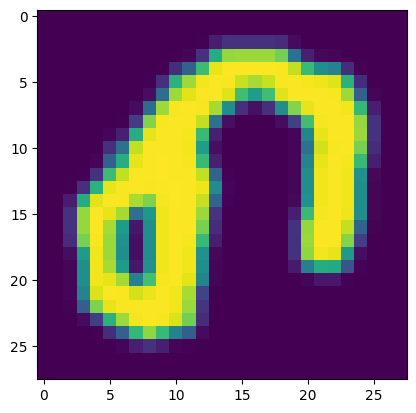

In [65]:
# images are flipped and rotated 90° (instead of fixing it here, I just transform images at inference time)
plt.imshow(x_test[0].reshape([28,28]))
print(label_map[y_test[0]])

In [66]:
x_train = x_train / 255
x_test = x_test / 255

In [67]:
x_train = x_train.reshape([-1, 28, 28, 1])
x_test = x_test.reshape([-1, 28, 28, 1])

In [68]:
len(labels)

47

In [69]:
y_train = tf.keras.utils.to_categorical(y_train, 47)
y_test = tf.keras.utils.to_categorical(y_test, 47)

In [70]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

In [90]:
# model = tf.keras.Sequential([
#     tf.keras.Input((28, 28, 1)),
    
#     tf.keras.layers.Conv2D(32,5),
#     tf.keras.layers.Conv2D(32,5),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # tf.keras.layers.Dropout(0.25),

#     tf.keras.layers.Conv2D(64,3),
#     tf.keras.layers.Conv2D(364,3),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # tf.keras.layers.Dropout(0.25),
    
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512,activation='relu'),
#     tf.keras.layers.Dense(128,activation='relu'),
#     # tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(47,activation='softmax')
# ])

model = tf.keras.Sequential([ 
    tf.keras.Input((28, 28, 1)),
    tf.keras.layers.Conv2D(32,3),
    tf.keras.layers.MaxPooling2D(2,2, padding='same'),
    tf.keras.layers.Dropout(0.30),
    
    tf.keras.layers.Conv2D(32,3),
    tf.keras.layers.MaxPooling2D(2,2, padding='same'),
    tf.keras.layers.Dropout(0.30),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.30),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.30),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.30),
    
    tf.keras.layers.Dense(47,activation='softmax')
])

# model = tf.keras.Sequential([
#     tf.keras.Input((784,)),
#     tf.keras.layers.Dense(1024, activation='relu'),
#     #tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(1024, activation='relu'),
#     #tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(512, activation='relu'),
#     #tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(256, activation='relu'),
#     #tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(47, activation='softmax')
# ])

In [91]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [92]:
history = model.fit(x_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(x_val, y_val))

Epoch 1/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.3464 - loss: 2.4102 - val_accuracy: 0.8063 - val_loss: 0.5866
Epoch 2/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7562 - loss: 0.7483 - val_accuracy: 0.8474 - val_loss: 0.4395
Epoch 3/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8068 - loss: 0.5771 - val_accuracy: 0.8643 - val_loss: 0.3954
Epoch 4/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8294 - loss: 0.5037 - val_accuracy: 0.8695 - val_loss: 0.3734
Epoch 5/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8405 - loss: 0.4643 - val_accuracy: 0.8721 - val_loss: 0.3567
Epoch 6/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8518 - loss: 0.4325 - val_accuracy: 0.8729 - val_loss: 0.3543
Epoch 7/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8554 - loss: 0.4107 - val_accuracy: 0.8773 - val_loss: 0.3431
Epoch 8/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8618 - loss: 0.3921 - val_accuracy: 

In [93]:
model.save("trained_model.h5")

In [94]:
model.evaluate(x_test, y_test)

588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8828 - loss: 0.3490


[0.343639612197876, 0.8824405670166016]